# About the DataSet
- In this classification project we will be using the length and widths of the flower's sepal and petals to predict which of these three types of iris the flower is. If our model works well, we will be able to apply it to unseen data -- allowing us to predict the type of flower without knowing its true class.
- Our goal is to create a Logistic Regression classification model that will predict which class the flower is based on petal and sepal size

<center>
<img src="https://www.gardenia.net/storage/app/public/uploads/images/detail/shutterstock_1099918727Optimized.webp", width="400",  height="300" />
</center>

# Import lybraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#for graphs, visuals, etc.
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# once add
import plotly.express as px
import cufflinks as cf
cf.go_offline()
# for Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



## Import data
- Iris is an internal dataSet in sklearn and we just need to import dataSet

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
# some information from documentation
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# Dataset Keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# How data Look!
#data initially comes as dictionary with array of lists, split between 'data' and 'target' values
print(data.data[:5])
print(data.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# and our target Feature is:
print(data.target)
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


# What is our problem and what should we do?
- We have four characteristics of these three types of flowers, and using these characteristics(sepal length,sepal           width,petal length and petal width) for predict which class the Iris belongs to(setosa,Versicolor or virginica).

  We use Classification to solve this issue

# Create DataFrame
- We will create Pandas DataFrame because we can intract whit data simpler.

In [6]:
tod = pd.DataFrame(data.data)
tod.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**The data is not already labeled, so we can reference the sklearn website for further information about the data and features**

in the documentation the data features are listed as: 
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

**What do these features refer to?**
- Sepal is the green part around the flower petals that enclose the flower when the flower is not in bloom. This is measured by length and width in centimeters as a feature for predicting what type of iris it is. 
- The length and width of the petals, or the colorful leaves of the flower, are also measured in centimeters.

In [7]:
# Lets rename the columns with these features so we know what the variables are referring to when we model the data later.
tod.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
#now the data is in a dataframe where we can easily see what each of the numbers is referring to
tod.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# add target column to DataFrme
target = pd.DataFrame(data.target)
target = target.rename(columns = {0: 'target'})
print(target.head())
print('all target column have 3 value: ',target.target.unique())

   target
0       0
1       0
2       0
3       0
4       0
all target column have 3 value:  [0 1 2]


- **What do these numbers refer to in the target column?**
- 0 = Iris Setosa
- 1 = Iris Versicolour
- 2 = Iris Virginica

In [9]:
# add target column to DataFrme
tod = pd.concat([tod, target], axis = 1)
tod.head()
# This will allow us to see how the features line up with the class determinations

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Statistics description

In [10]:
# general statistical overview of the data columns
# this is also a good way to check your data for extreme outliers if the min/max seems extremely far from the mean, you can investigate the data further
tod.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Data Cleaning
> It's super important to look through your data, make sure it is clean, and begin to explore relationships between features and target variables. Since this is a relatively simple data set there is not much cleaning that needs to be done. But it is important to still go through these steps everytime. 

In [11]:
print('see what type of data you have:\n',tod.dtypes)
print('<---------------------------------------------------->')
print('check for missing values:\n',tod.isnull().sum())

see what type of data you have:
 sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
target            int64
dtype: object
<---------------------------------------------------->
check for missing values:
 sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64


# Exploratory Data Analysis (EDA)

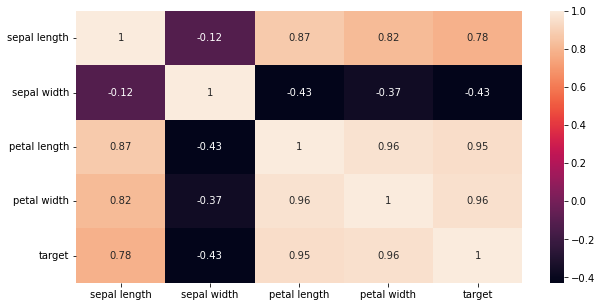

In [12]:
#check correlations by using heatmap
plt.rcParams['figure.figsize'] = [10,5]
sns.heatmap(tod.corr(), annot = True);

**Petal length** and **width** is **most correlated with the target**, meaning that as these numbers increase, so does the target value. In this case, it means that flowers in **class 2** often have **longer petal length and width** than flowers in **class 0**. **Sepal width is most anti-correlated**, indicating that flowers in class 0 have the greatest sepal width than those in class 2. We can also see some intercorrelation between features, for example petal width and length are also highly correlated.

## Visualize the relationship between sepal length and width

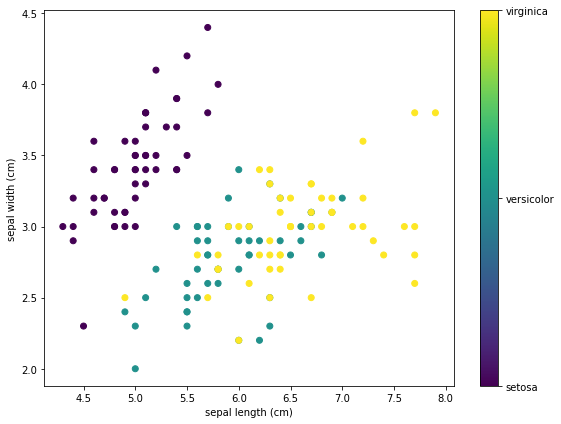

In [13]:
# To start looking at the relationships between features, we can create scatter plots
# to further visualize the way the different classes of flowers relate to sepal and petal data

x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args:data.target_names[int(i)])
plt.figure(figsize=(8,6))
plt.scatter(data.data[:, x_index], data.data[:, y_index], c=data.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(data.feature_names[x_index])
plt.ylabel(data.feature_names[y_index])
plt.tight_layout()
plt.show()

## Visualize the relationship between petal length and width

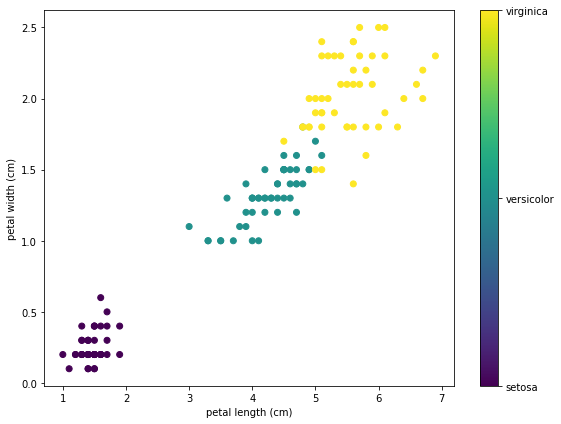

In [14]:
# Now let’s create the same scatter plot to compare the petal data points.
x_index = 2
y_index = 3

formatter = plt.FuncFormatter(lambda i, *args:data.target_names[int(i)])
plt.figure(figsize=(8,6))
plt.scatter(data.data[:, x_index], data.data[:, y_index], c=data.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(data.feature_names[x_index])
plt.ylabel(data.feature_names[y_index])
plt.tight_layout()
plt.show()

# Distributions of features

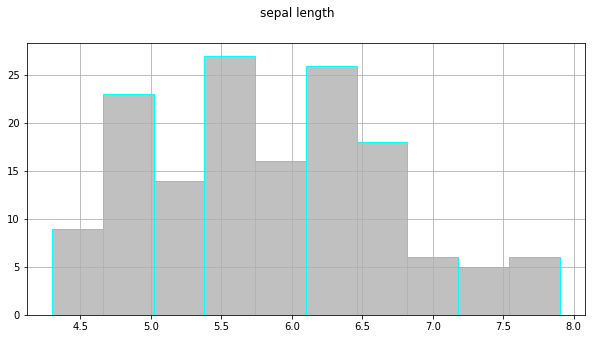

<----------------------------------------------------------------------------------->


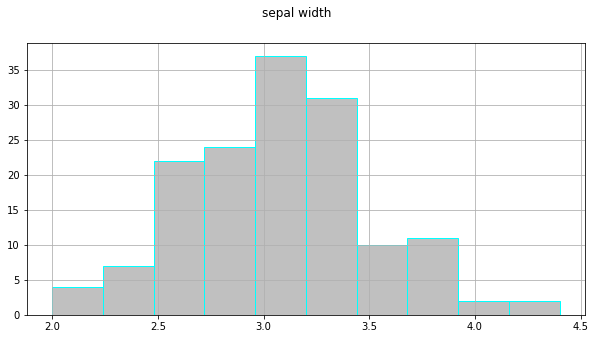

<----------------------------------------------------------------------------------->


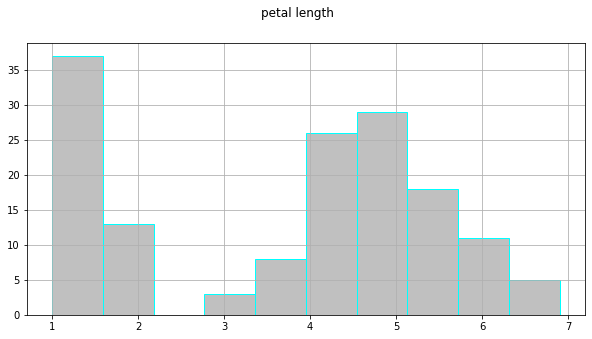

<----------------------------------------------------------------------------------->


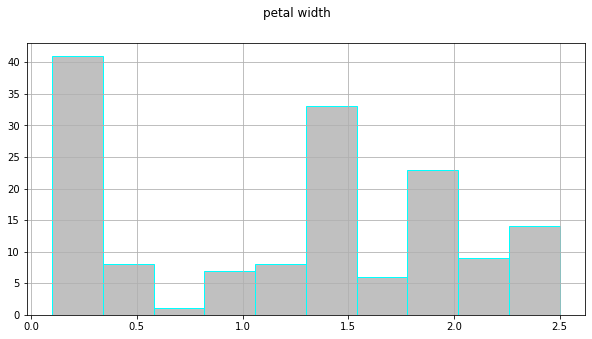

<----------------------------------------------------------------------------------->


In [15]:
for feat in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    tod[feat].hist(ec='aqua',color='#C0C0C0')
    plt.suptitle(feat)
    plt.show()
    print('<----------------------------------------------------------------------------------->')

# Modelling
- Now that we have cleaned and explored the data, we can begin to develop a model. Our goal is to create a Logistic Regression classification model that will predict which class the flower is based on petal and sepal sizes

## split the dataframe back into X (data) and y (target)

In [16]:
# before that split features from target
X = tod.copy()
y = X.pop('target')
# 80% of the data will be the training data, and 20% will be the test data to evaluate our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)
# -by stratifying on y we assure that the different classes are represente
#  proportionally to the amount in the total data (this makes sure that all of
#  class 1 is not in the test group only

In [17]:
# here we can see how the data is split into the different groups
print('How split: \n')
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

How split: 

X train (120, 4)
y train (120,)
X test (30, 4)
y test (30,)


## Standardize
- With the X values split between training and test, now we can standardize the values. This puts the numbers on a consistent scale while keeping the proportional relationship between them

In [18]:
# This puts the X values on a standard scale for all features, while keeping the scale of differences between the values.
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Baseline Prediction
- The baseline is the probability of predicting class before the model is implemented. If the data is split into 2 classes evenly, there is already a 50% chance of randomly assigning an element to the correct class. The goal of our model is to improve on this baseline, or random prediction

In [19]:
print(tod.target.value_counts(normalize= True))
print('\n The baseline prediction for this model is 1/3')

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

 The baseline prediction for this model is 1/3


## Logistic Regression Model
- Logistic Regression is one of the most straight forward yet effective classification models, allowing binary or multiple class prediction. 

In [20]:
lg = LogisticRegression()
#fit data
lg.fit(X_train, y_train)
#accuracy of the model
print('accuracy of model: ',lg.score(X_test, y_test))
# the test score is good, but we can also use cross validated scor to ensure
cvs = cross_val_score(lg, X_train, y_train, cv=10)
print('accuracy of model after CVS: ',np.mean(cvs))


# any adjustments or tuning, this model is already performing very well with
# a test score of .9667 and a cross validation score of .9499.
# This means that the model is predicting the correct class for the flower about 95% of time.

accuracy of model:  0.9666666666666667
accuracy of model after CVS:  0.9499999999999998


## Coefficients
- Coefficients are often a bit hard to interpret in Logistic Regression, but we can get an idea of how much of an impact each of the features had in deciding if a flower belonged to that class. For instance, petal length was barely a deciding factor for if a flower was in class 1, but petal width was a strong predictor for class 2

In [21]:
tod_coef = pd.DataFrame(lg.coef_, columns=X_train.columns)
tod_coef

,sepal length,sepal width,petal length,petal width
0,-1.102746,1.001818,-1.836891,-1.667978
1,0.402982,-0.323432,-0.277761,-0.650011
2,0.699764,-0.678386,2.114653,2.317989


## Predicted Values
- Look at the predictions that the model made for the test data set

In [22]:
predict = lg.predict(X_test)
# compare test and train data
compar = pd.DataFrame({'actual': y_test, 'predicted': predict})
compar = compar.reset_index(drop = True)
compar[:10]

,actual,predicted
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


## Confusion Matrix
- In the confusion matrix above the predicted values are the columns and the actual are the rows. It allows us to see where the model makes true and false predictions, and if it predicts incorrectly, we can see which class it is predicting falsely

In [23]:
pd.DataFrame(confusion_matrix(y_test, predict, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

# We can see that class 0 and 1 were all predicted correctly all 10 times,
# but the model incorrectly labeled class 2 as class 1 in one instance.

,2,1,0
2,9,1,0
1,0,10,0
0,0,0,10


## Classification Report
*Another good way to check how your model is performing is by looking at the classification report.*
- Precision
- Recall
- F1 Score
- Accuracy


In [24]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<center>
<span style="font-family:Comic Sans MS; color:navy"><h2>Thank You😊</h2></span>
</center>